In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

In [2]:
# Useful function

def get_highest_values(arr, n):
    return np.array(arr).argsort()[-n:][::-1]

def get_lowest_values(arr, n):
    return np.array(arr).argsort()[::-1][-n:][::-1]

In [5]:
data_file = "data/temp.train"

## Correlation analysis between SVD features

In [6]:
df = pd.read_csv(data_file, sep=';', header=None)
df = df.drop(df.columns[[0]], axis=1)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
0,0.652851,0.080402,0.056751,0.039518,0.033673,0.027273,0.023607,0.020556,0.017670,0.013568,...,0.000035,0.000028,0.000027,0.000024,0.000021,0.000017,0.000009,0.000008,0.000004,1.686444e-06
1,0.652760,0.080416,0.056754,0.039546,0.033672,0.027291,0.023601,0.020557,0.017670,0.013580,...,0.000036,0.000029,0.000026,0.000024,0.000020,0.000014,0.000013,0.000009,0.000008,2.844966e-06
2,0.643783,0.080578,0.057158,0.039712,0.033941,0.027758,0.023486,0.020380,0.017896,0.013507,...,0.000083,0.000069,0.000064,0.000057,0.000049,0.000037,0.000029,0.000019,0.000011,3.036373e-06
3,0.650533,0.080679,0.056969,0.039813,0.033782,0.027492,0.023604,0.020538,0.017768,0.013596,...,0.000056,0.000053,0.000051,0.000037,0.000033,0.000025,0.000021,0.000015,0.000010,1.173903e-06
4,0.652726,0.080419,0.056751,0.039549,0.033665,0.027298,0.023603,0.020559,0.017683,0.013588,...,0.000041,0.000030,0.000029,0.000023,0.000019,0.000014,0.000012,0.000010,0.000007,7.965241e-07


In [7]:
# Compute the correlation matrix
corr = df[1:200].corr()

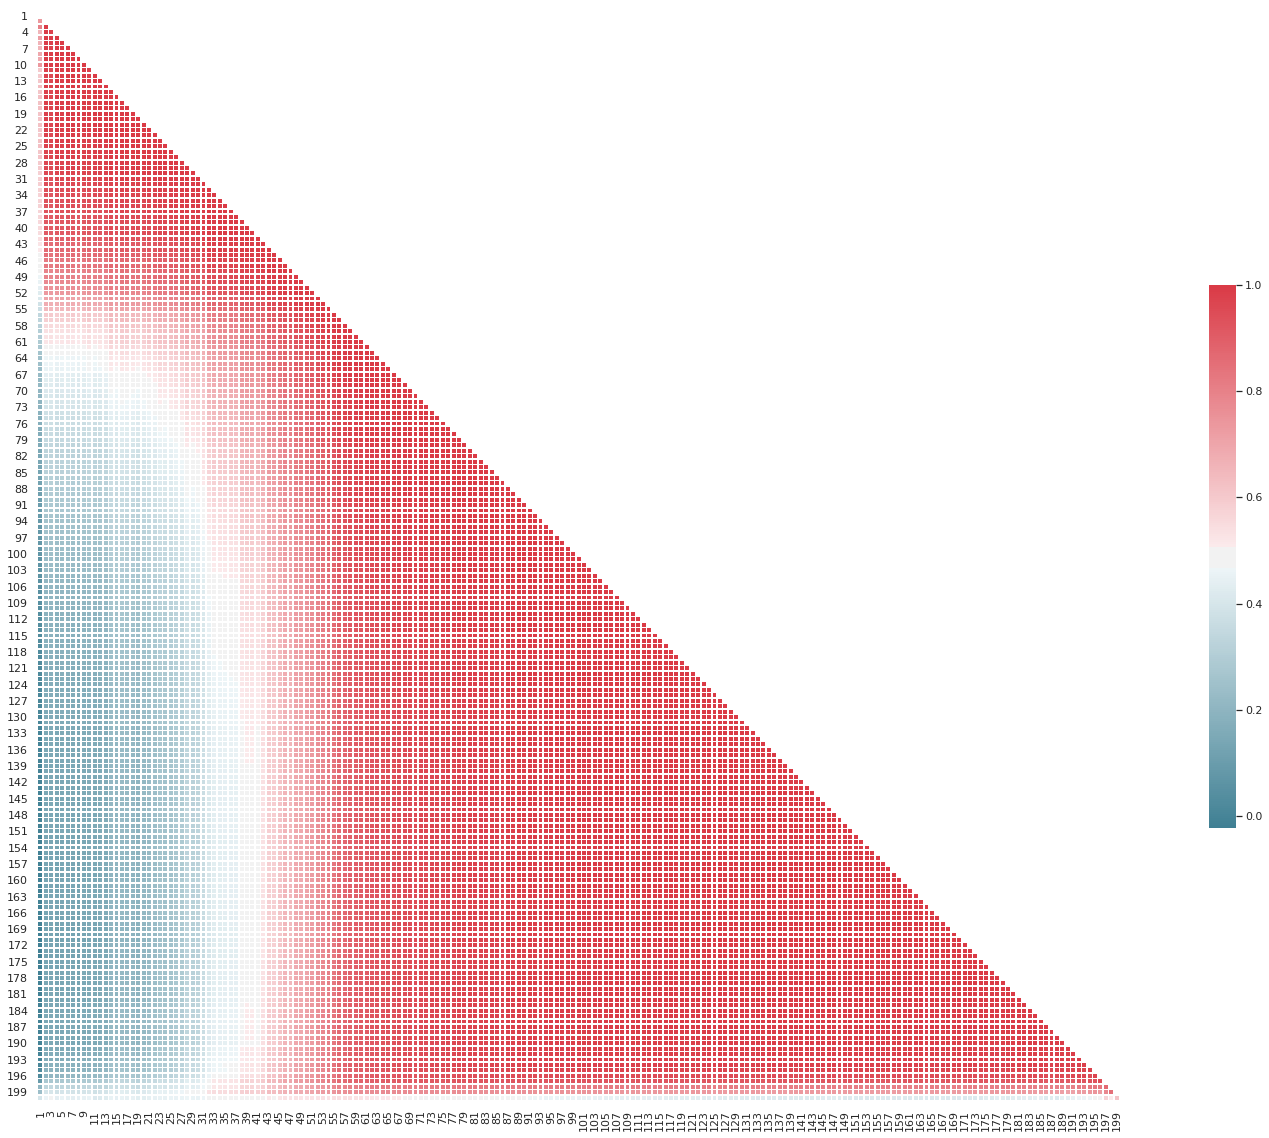

In [8]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
features_corr = []

for id_row, row in enumerate(corr):
    correlation_score = 0
    for id_col, val in enumerate(corr[row]):
        if id_col != id_row:
            correlation_score += abs(val)

    features_corr.append(correlation_score)

In [10]:
get_highest_values(features_corr, 20)

array([63, 64, 62, 65, 66, 61, 67, 68, 69, 60, 70, 59, 71, 58, 72, 57, 73,
       74, 75, 76])

In [11]:
get_lowest_values(features_corr, 20)

array([  0,   7,   3,   2,   1,   6,   4,   8,  10,   5,  11,   9,  12,
       199,  18,  14,  17,  13,  19,  16])

## Correlation analysis between SVD features and labels

In [12]:
df = pd.read_csv(data_file, sep=';', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0,0.652851,0.080402,0.056751,0.039518,0.033673,0.027273,0.023607,0.020556,0.017670,...,0.000035,0.000028,0.000027,0.000024,0.000021,0.000017,0.000009,0.000008,0.000004,1.686444e-06
1,0,0.652760,0.080416,0.056754,0.039546,0.033672,0.027291,0.023601,0.020557,0.017670,...,0.000036,0.000029,0.000026,0.000024,0.000020,0.000014,0.000013,0.000009,0.000008,2.844966e-06
2,1,0.643783,0.080578,0.057158,0.039712,0.033941,0.027758,0.023486,0.020380,0.017896,...,0.000083,0.000069,0.000064,0.000057,0.000049,0.000037,0.000029,0.000019,0.000011,3.036373e-06
3,0,0.650533,0.080679,0.056969,0.039813,0.033782,0.027492,0.023604,0.020538,0.017768,...,0.000056,0.000053,0.000051,0.000037,0.000033,0.000025,0.000021,0.000015,0.000010,1.173903e-06
4,0,0.652726,0.080419,0.056751,0.039549,0.033665,0.027298,0.023603,0.020559,0.017683,...,0.000041,0.000030,0.000029,0.000023,0.000019,0.000014,0.000012,0.000010,0.000007,7.965241e-07


In [13]:
# Compute the correlation matrix
corr = df.corr()

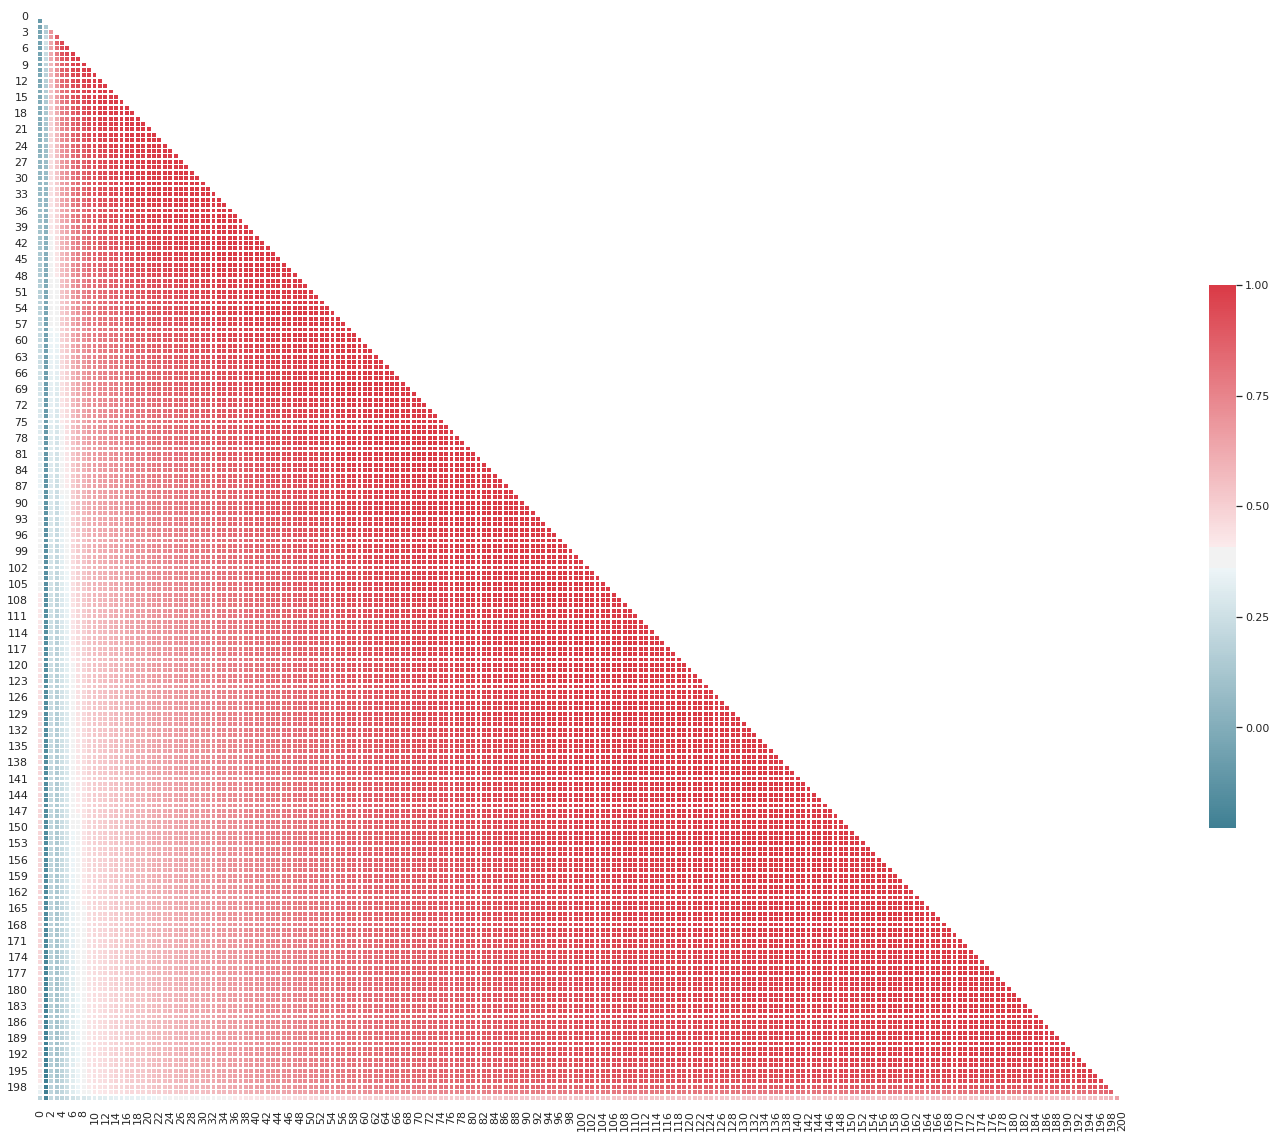

In [14]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [15]:
features_corr = []

for id_row, row in enumerate(corr):
    for id_col, val in enumerate(corr[row]):
        if id_col == 0 and id_row != 0:
            features_corr.append(abs(val))

In [16]:
get_highest_values(features_corr, 20)

array([162, 165, 164, 161, 160, 168, 163, 166, 167, 169, 159, 158, 156,
       170, 155, 157, 154, 171, 153, 152])

In [17]:
get_lowest_values(features_corr, 20)

array([16, 17, 18, 15, 19, 20, 13, 14, 12, 21, 22, 11, 23, 10, 24,  9,  8,
       25,  7,  2])